![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Data Driven Business - Final Project - Modeling

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read in the selected_features.csv file
raw = pd.read_csv('selected_features.csv')
df = raw.copy()


In [4]:
df

,no_of_children,no_of_week_nights,arrival_date,avg_price_per_room,booking_status
0,0.0,2.0,2.0,65.00,0.0
1,0.0,3.0,6.0,106.68,0.0
2,0.0,1.0,28.0,60.00,1.0
3,0.0,2.0,20.0,100.00,1.0
4,0.0,1.0,11.0,94.50,1.0
...,...,...,...,...,...
35725,0.0,6.0,3.0,167.80,0.0
35726,0.0,3.0,17.0,90.95,1.0
35727,0.0,6.0,1.0,98.39,0.0
35728,0.0,3.0,21.0,94.50,1.0


/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

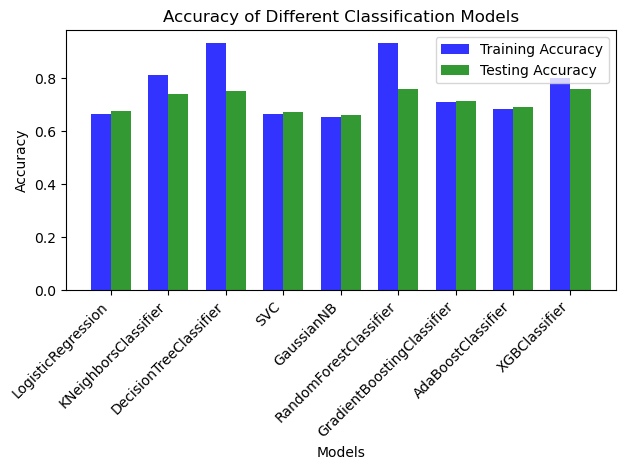

In [20]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# load dataset
data = df

# separate the features and target variables
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a list of 10 different classification models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    #LGBMClassifier()
]

# create empty lists to store the accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []
model_names = []

# loop through each model and train it on the training data
for model in models:
    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the target variable on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate the accuracy score on the training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # append the accuracy score and model name to the lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    model_names.append(type(model).__name__)

# create a bar chart of the accuracy scores
fig, ax = plt.subplots()
x_pos = np.arange(len(model_names))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x_pos, train_accuracy_scores, bar_width,
                alpha=opacity, color='b',
                label='Training Accuracy')

rects2 = ax.bar(x_pos + bar_width, test_accuracy_scores, bar_width,
                alpha=opacity, color='g',
                label='Testing Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Classification Models')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

